In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Dataset preparation

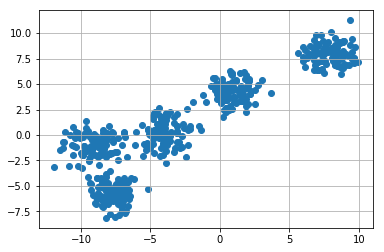

In [72]:
x, y = make_blobs(n_samples=500, n_features = 2, centers=5, random_state = 3)
plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [16]:
k = 5
color = ["green", "red", "blue", "yellow", "orange"]

clusters = {}

for i in range(k):
    center = (8 * np.random.random(x.shape[1],)) - 4
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster
    
for i in range(5):
    print(clusters[i])

{'center': array([-1.47394231, -3.04956435]), 'points': [], 'color': 'green'}
{'center': array([ 3.13280369, -2.81757825]), 'points': [], 'color': 'red'}
{'center': array([-1.59109618,  3.5048072 ]), 'points': [], 'color': 'blue'}
{'center': array([-1.49185858, -3.49009508]), 'points': [], 'color': 'yellow'}
{'center': array([ 1.39236755, -3.06380088]), 'points': [], 'color': 'orange'}


In [17]:
def assignPointToClusters(clusters):         # E-step
    
    for i in range(x.shape[0]):
        
        curr_x = x[i,:]
        dist = []
        
        for j in range(5):
            
            d = np.sqrt(np.sum((curr_x - clusters[j]['center'])**2))
            dist.append(d)
        
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
            

def updateClusters(clusters):
    
    for i in range(k):
        
        pts = np.array(clusters[i]['points'])
        
        if pts.shape[0] > 0: #If a cluster has some-nonzero points

            m = pts.mean(axis=0)
            clusters[i]['center'] = m
            clusters[i]['points'] = []
      
        
def plotClusters(clusters):
    
    for i in range(k):

        pts = np.array(clusters[i]['points'])

        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['color'])
        except:
            pass
        
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],color="black",s=100, marker="*")
    
    plt.grid(True)
    plt.show()

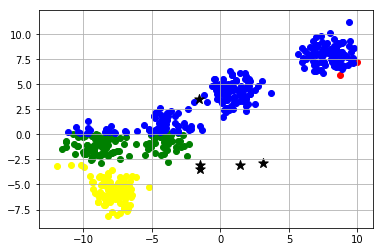

In [18]:
assignPointToClusters(clusters)
plotClusters(clusters)

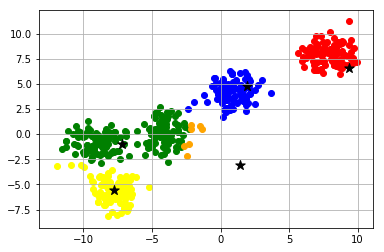

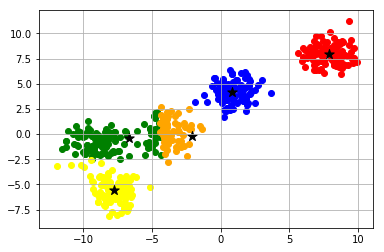

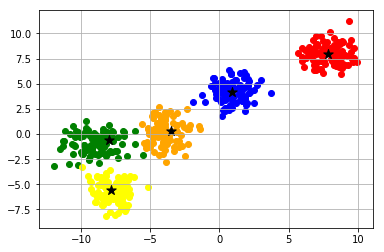

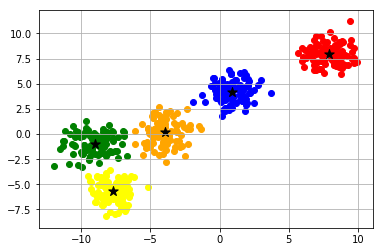

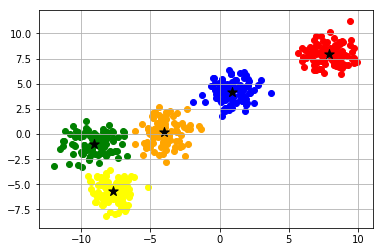

In [19]:
for i in range(k):
    updateClusters(clusters)
    assignPointToClusters(clusters)
    plotClusters(clusters)

## Using Sci-kit learn

In [20]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(n_clusters = 5)
km.fit(x,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
centers = km.cluster_centers_
print(centers)

pred = km.labels_        # allocates nearest cluster to every point
print(pred)                

[[-9.0671623  -0.96740759]
 [ 0.88641907  4.19441853]
 [ 7.8649674   7.97988109]
 [-3.97953526  0.19458336]
 [-7.6726196  -5.69211059]]
[4 2 3 4 4 3 0 4 2 4 2 3 2 4 3 4 2 4 4 2 1 1 4 3 4 1 0 0 3 0 4 0 1 1 4 1 2
 2 4 1 1 1 0 0 3 2 2 0 0 0 2 4 0 4 4 1 4 4 2 3 2 3 3 4 0 2 3 3 1 3 1 4 1 4
 1 3 4 0 1 1 3 1 3 0 2 0 3 2 0 3 0 1 4 1 1 2 4 3 3 1 2 1 3 3 2 2 2 3 3 4 2
 0 4 2 3 1 2 0 1 3 2 3 0 4 1 0 0 0 4 4 3 3 4 2 2 0 3 0 3 4 4 1 3 2 0 4 2 2
 4 3 4 4 3 3 2 1 1 0 3 4 1 2 0 1 2 1 2 1 1 1 0 4 1 2 1 0 4 3 2 0 2 4 2 1 0
 0 1 4 3 2 1 3 0 4 0 1 3 0 4 4 4 1 1 2 4 0 0 4 2 4 4 4 1 2 3 2 4 4 2 0 3 0
 0 1 4 3 4 3 0 1 3 3 4 1 4 1 3 2 3 1 1 2 4 4 3 3 1 2 1 4 0 2 0 4 0 0 0 0 2
 1 2 4 1 2 0 3 2 2 2 0 4 4 3 1 1 2 3 3 4 3 0 3 2 2 0 0 1 0 0 2 1 4 3 1 3 0
 3 3 2 4 1 2 1 1 4 0 1 3 1 0 4 4 3 2 1 0 2 1 3 0 2 0 4 1 0 3 3 1 1 1 4 0 1
 4 2 3 3 0 2 2 3 3 0 1 1 1 4 0 2 0 4 1 2 2 3 1 1 0 1 0 3 3 3 0 1 4 1 3 0 0
 2 4 2 0 4 0 3 2 1 2 3 4 4 2 2 1 2 1 0 3 2 0 4 4 2 3 1 0 4 4 4 0 2 1 2 2 2
 0 1 3 2 3 3 0 3 4 3 4 2 1 1 4 2 0 4 1 

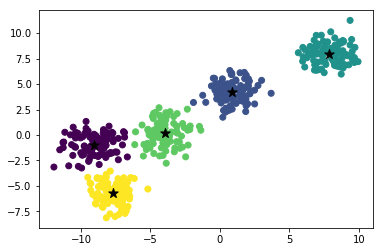

In [37]:
plt.scatter(x[:,0],x[:,1], c= pred)
plt.scatter(centers[:,0], centers[:,1], marker = '*', s= 100, color = 'black')
plt.show()

## Make moon dataset

In [79]:
from sklearn.datasets import make_circles, make_moons

In [80]:
x, y = make_moons(n_samples = 500, noise = 0.1)

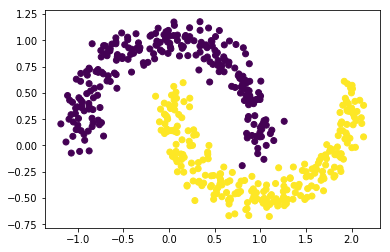

In [81]:
plt.scatter(x[:,0], x[:,1], c=y)

In [82]:
km = KMeans(n_clusters = 2)
km.fit(x,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [83]:
centers = km.cluster_centers_
print(centers)

pred = km.labels_        # allocates nearest cluster to every point
print(pred)      

[[ 1.19205711 -0.06475474]
 [-0.22533892  0.59806777]]
[0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1
 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0
 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1
 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0
 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 

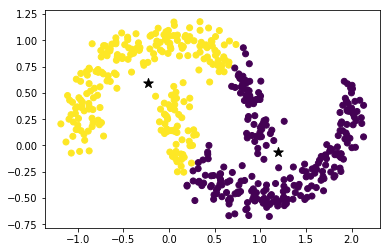

In [84]:
plt.scatter(x[:,0],x[:,1], c= pred)
plt.scatter(centers[:,0], centers[:,1], marker = '*', s= 100, color = 'black')
plt.show()

## DBSCAN
- Density Based Spatial Clustering of Applications with Noise
- Based upon on the idea, that a cluster is a high density area surrounded by low density region
- Starts by exploring a small area, if density is "good enough" it considered as part of cluster, and explores neigbours and so on, so it groups regions based upon density!

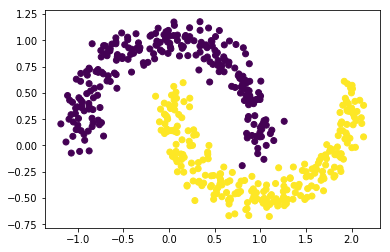

In [85]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [96]:
from sklearn.cluster import DBSCAN

In [133]:
dbs = DBSCAN
dbs = DBSCAN(eps=0.17,min_samples=3)
dbs.fit(x)
Ypred = dbs.fit_predict(x)

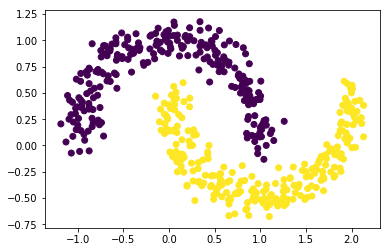

In [134]:
plt.scatter(x[:,0],x[:,1],c=Ypred)
plt.show()